In [1]:
## Import Packages / Setup the matplotlib configuration

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

np.random.seed(42)

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
set(df_train.Embarked)

{'C', 'Q', 'S', nan}

In [7]:
df_train_filtered = df_train.loc[:,~df_train.columns.isin(['Name', 'Ticket', 'Cabin'])]

In [8]:
df_train_filtered

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [9]:
df_train_filtered['Age'] = SimpleImputer(strategy = 'mean').fit_transform(df_train_filtered[['Age']])
df_train_filtered['Embarked'] = SimpleImputer(strategy = 'constant', fill_value = 'C').fit_transform(df_train_filtered[['Embarked']])

/tmp/ipykernel_182/3628879846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered['Age'] = SimpleImputer(strategy = 'mean').fit_transform(df_train_filtered[['Age']])
/tmp/ipykernel_182/3628879846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered['Embarked'] = SimpleImputer(strategy = 'constant', fill_value = 'C').fit_transform(df_train_filtered[['Embarked']])


In [10]:
df_train_filtered.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [11]:
df_train_filtered

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [12]:
df_train_num = df_train_filtered[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
df_train_cat = df_train_filtered[['Sex', 'Embarked']]

x_prelim = np.concatenate((df_train_num.values, OneHotEncoder().fit_transform(df_train_cat).toarray()), axis = 1)
y_prelim = df_train_filtered['Survived'].values

x_prelim_train, x_prelim_test, y_prelim_train, y_prelim_test = train_test_split(x_prelim, y_prelim, test_size = 0.8, random_state = 42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

models = [
    ('SV', SVC()),
    ('LOG', LogisticRegression(max_iter = 1000)),
    ('GB', GradientBoostingClassifier()),
    ('ADA', AdaBoostClassifier()),
    ('MLP', MLPClassifier()),
    ('KN', KNeighborsClassifier()),
    ('RF', RandomForestClassifier()),
    ('DTR', DecisionTreeClassifier()),
    ('GAUSS', GaussianProcessClassifier()),
    ('GNB', GaussianNB())
]

res = {}

for name, model in models:
    y_prelim_pred = model.fit(x_prelim_train, y_prelim_train).predict(x_prelim_test)
    res[name] = accuracy_score(y_prelim_test, y_prelim_pred)

/home/studio-lab-user/.conda/envs/ML_default/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
res

{'SV': 0.6507713884992987,
 'LOG': 0.7952314165497896,
 'GB': 0.8050490883590463,
 'ADA': 0.7685834502103787,
 'MLP': 0.7727910238429172,
 'KN': 0.6633941093969145,
 'RF': 0.7854137447405329,
 'DTR': 0.7208976157082749,
 'GAUSS': 0.6633941093969145,
 'GNB': 0.7489481065918654}

In [15]:
class preProcessor:
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        X_num = X[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
        X_cat = X[['Sex', 'Embarked']]

        
        X_num = SimpleImputer(strategy = 'mean').fit_transform(X_num)
        X_cat = SimpleImputer(strategy = 'most_frequent').fit_transform(X_cat)
        return np.concatenate((X_num, OneHotEncoder().fit_transform(X_cat).toarray()), axis = 1)        

In [16]:
preProcessor().transform(df_train)

array([[ 3.        , 22.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 38.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        , 26.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 3.        , 29.69911765,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 26.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        , 32.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [17]:
models = [
    ('SV', SVC()),
    ('LOG', LogisticRegression(max_iter = 1000)),
    ('GB', GradientBoostingClassifier()),
    ('ADA', AdaBoostClassifier()),
    ('MLP', MLPClassifier(max_iter = 1000)),
    ('KN', KNeighborsClassifier()),
    ('RF', RandomForestClassifier()),
    ('DTR', DecisionTreeClassifier()),
    ('GAUSS', GaussianProcessClassifier()),
    ('GNB', GaussianNB())
]

num_folds = 10

x = df_train.loc[:,df_train.columns!='Survived']
y = df_train['Survived']

names = [n for (n,m) in models]
kfold_results = []

for i, md in enumerate(models):
    models[i] = Pipeline([('preProcess', preProcessor()), md])

for i, model in enumerate(models):
    print(f'{names[i]} started')
    kfold_results.append(cross_val_score(model, x, y, cv = num_folds))

SV started
LOG started
GB started
ADA started
MLP started
KN started
RF started
DTR started
GAUSS started
GNB started


In [18]:
kfold_results

[array([0.62222222, 0.58426966, 0.68539326, 0.74157303, 0.69662921,
        0.69662921, 0.68539326, 0.71910112, 0.70786517, 0.6741573 ]),
 array([0.78888889, 0.79775281, 0.7752809 , 0.80898876, 0.78651685,
        0.7752809 , 0.78651685, 0.78651685, 0.80898876, 0.84269663]),
 array([0.78888889, 0.83146067, 0.74157303, 0.87640449, 0.87640449,
        0.86516854, 0.85393258, 0.82022472, 0.86516854, 0.84269663]),
 array([0.75555556, 0.7752809 , 0.78651685, 0.83146067, 0.84269663,
        0.79775281, 0.80898876, 0.80898876, 0.83146067, 0.82022472]),
 array([0.68888889, 0.74157303, 0.7752809 , 0.7752809 , 0.78651685,
        0.70786517, 0.76404494, 0.79775281, 0.82022472, 0.7752809 ]),
 array([0.63333333, 0.70786517, 0.68539326, 0.71910112, 0.74157303,
        0.71910112, 0.79775281, 0.70786517, 0.65168539, 0.79775281]),
 array([0.71111111, 0.79775281, 0.76404494, 0.83146067, 0.80898876,
        0.85393258, 0.80898876, 0.74157303, 0.79775281, 0.86516854]),
 array([0.73333333, 0.7752809 , 0.

[Text(1, 0, 'SV'),
 Text(2, 0, 'LOG'),
 Text(3, 0, 'GB'),
 Text(4, 0, 'ADA'),
 Text(5, 0, 'MLP'),
 Text(6, 0, 'KN'),
 Text(7, 0, 'RF'),
 Text(8, 0, 'DTR'),
 Text(9, 0, 'GAUSS'),
 Text(10, 0, 'GNB')]

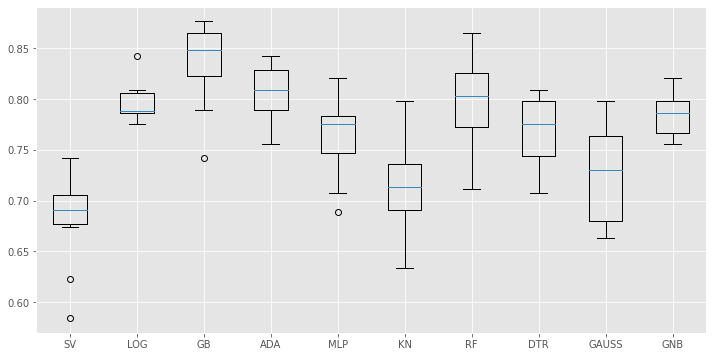

In [19]:
fig, ax = plt.subplots()
ax.boxplot(list(kfold_results))
ax.set_xticklabels(names)

In [20]:
GB = Pipeline([('preProcess', preProcessor()), ('GB', GradientBoostingClassifier())])

parameters = {
    'GB__learning_rate' : np.linspace(1e-3,1,100),
    'GB__n_estimators' : np.linspace(1,10,10, dtype = int)
}

clf = GridSearchCV(GB, parameters, cv = 5, scoring = 'accuracy', verbose = 1)
clf.fit(x, y)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preProcess',
                                        <__main__.preProcessor object at 0x7fe04427f3d0>),
                                       ('GB', GradientBoostingClassifier())]),
             param_grid={'GB__learning_rate': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0....
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
                         'GB__n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy', verbose=1)

In [21]:
best_params = clf.best_params_
best_params

{'GB__learning_rate': 0.6165454545454546, 'GB__n_estimators': 9}

In [22]:
GB = Pipeline([('preProcess', preProcessor()), ('GB', GradientBoostingClassifier(**{k.replace('GB__', '') : best_params[k] for k in best_params}))])
GB.fit(x, y)
df_test['Survived'] = GB.predict(df_test)
df_test.loc[:,['PassengerId', 'Survived']].to_csv('result.csv', index = False)

In [23]:
pd.read_csv('result.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
